In [1]:
!pip install sci-kit learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sci-kit (from versions: none)
ERROR: No matching distribution found for sci-kit


In [2]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

iris = datasets.load_iris()
print("iris datasets loaded")
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)
print("dataset is training and testing ....")
print("size of training data and its label", x_train.shape, y_train.shape)
print("size of training data and its label", x_test.shape, y_test.shape)
for i in range(len(iris.target_names)):
    print("label", i, "-", str(iris.target_names[i]))
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print("Results of classification using K-NN K=1")
    for r in range(0, len(x_test)):
        print("Sample: ", str(x_test[r]), "Actual-Label: ", str(y_test[r]), "Predicted-Label: ", str(y_pred[r]))
        print("Classification Accuracy: ", classifier.score(x_test, y_test))



iris datasets loaded
dataset is training and testing ....
size of training data and its label (135, 4) (135,)
size of training data and its label (15, 4) (15,)
label 0 - setosa
Results of classification using K-NN K=1
Sample:  [5.7 4.4 1.5 0.4] Actual-Label:  0 Predicted-Label:  0
Classification Accuracy:  1.0
Sample:  [4.6 3.2 1.4 0.2] Actual-Label:  0 Predicted-Label:  0
Classification Accuracy:  1.0
Sample:  [6.9 3.2 5.7 2.3] Actual-Label:  2 Predicted-Label:  2
Classification Accuracy:  1.0
Sample:  [7.1 3.  5.9 2.1] Actual-Label:  2 Predicted-Label:  2
Classification Accuracy:  1.0
Sample:  [5.4 3.  4.5 1.5] Actual-Label:  1 Predicted-Label:  1
Classification Accuracy:  1.0
Sample:  [6.1 2.9 4.7 1.4] Actual-Label:  1 Predicted-Label:  1
Classification Accuracy:  1.0
Sample:  [5.1 3.8 1.6 0.2] Actual-Label:  0 Predicted-Label:  0
Classification Accuracy:  1.0
Sample:  [6.7 3.  5.  1.7] Actual-Label:  1 Predicted-Label:  1
Classification Accuracy:  1.0
Sample:  [6.1 3.  4.6 1.4] Act

In [6]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


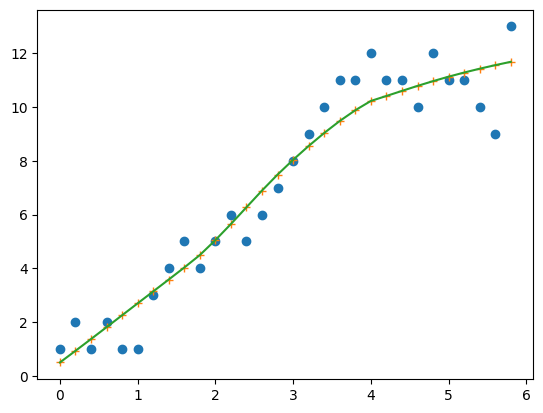

In [8]:
# Non parametric 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import statsmodels.api as sm

x=[i/5.0 for i in range(30)]
y=[1,2,1,2,1,1,3,4,5,4,5,6,5,6,7,8,9,10,11,11,12,11,11,10,12,11,11,10,9,13]

lowess=sm.nonparametric.lowess(y,x)
lowess_x=list(zip(*lowess))[0]
lowess_y=list(zip(*lowess))[1]

f=interp1d(lowess_x,lowess_y,bounds_error=False)
xnew=[i/10.0 for i in range(100)]
ynew=f(xnew)

plt.plot(x,y,'o')
plt.plot(lowess_x,lowess_y,'+')
plt.plot(lowess_x,lowess_y,'-')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


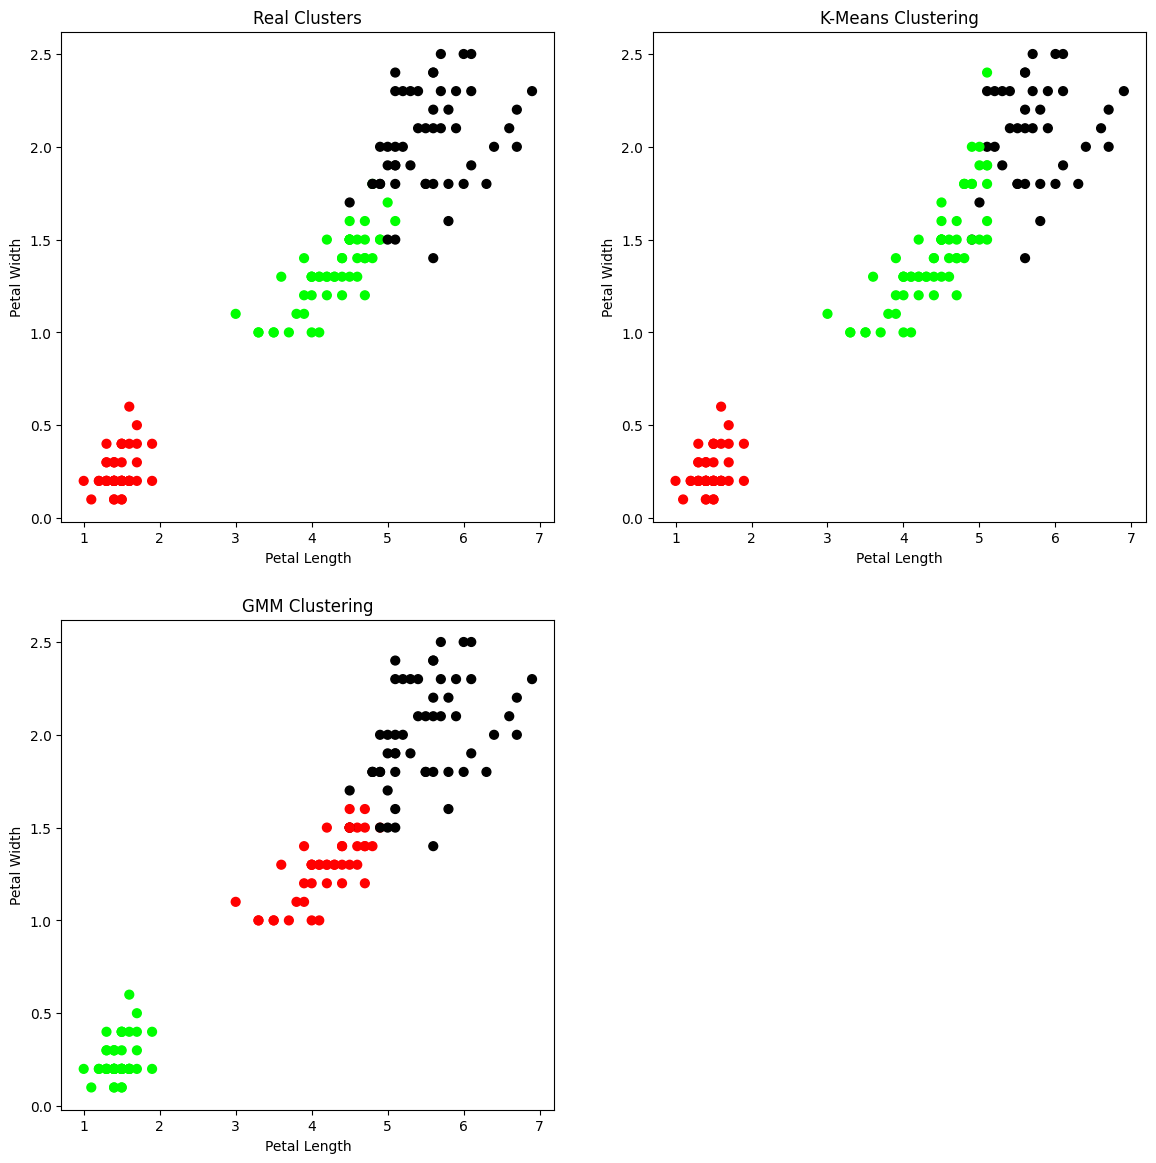

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
model = KMeans(n_clusters=3)
model.fit(X)
plt.figure(figsize=(14,14))
colormap = np.array(['red','lime','black'])
plt.subplot(2,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[y.Targets], s = 40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.subplot(2,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[model.labels_], s = 40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa,columns=X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y=gmm.predict(xs)
plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[gmm_y], s = 40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')
plt.show()


In [10]:
class Node():
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0
    def __eq__(self, other):
        return self.position == other.position
def astar(maze, start, end):
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0
    open_list = []
    closed_list = []
    open_list.append(start_node)
    while len(open_list) > 0:
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
        open_list.pop(current_index)
        closed_list.append(current_node)
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1]
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (
                    len(maze[len(maze) - 1]) - 1) or node_position[1] < 0:
                continue
            if maze[node_position[0]][node_position[1]] != 0:
                continue
            new_node = Node(current_node, node_position)
            children.append(new_node)
        for child in children:
            for closed_child in closed_list:
                if child == closed_child:
                    continue
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + (
                    (child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue
            open_list.append(child)
def main():
    maze = [[0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0]]
    graph = [[0, 1, 0, 0, 0, 0],
             [1, 0, 1, 0, 1, 0],
             [0, 1, 0, 0, 0, 1],
             [0, 0, 0, 0, 1, 0],
             [0, 1, 0, 1, 0, 0],
             [0, 0, 1, 0, 0, 0]]
    start = (0, 0)
    end = (5, 5)
    end1 = (5, 5)
    path = astar(maze, start, end)
    print("path",path)
    path1 = astar(graph, start, end1)
    print("path1",path1)
if __name__ == '__main__':
    main()


path [(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (5, 5)]
path1 [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]


In [32]:
!pip install numpy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


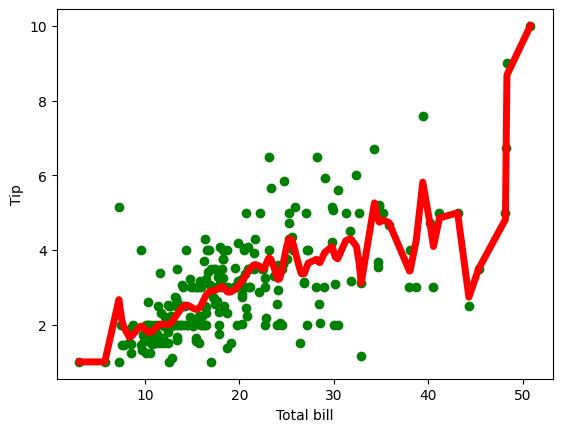

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point, xmat, ymat, k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
     
def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
       
# load data points
data = pd.read_csv('prg10.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
 
#preparing and add 1 in bill
mbill = np.mat(bill)
mtip = np.mat(tip)

m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))

#set k here
ypred = localWeightRegression(X,mtip,0.5)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();

In [36]:
!ls

 Gdrive   GDrive   MyDrive  'prg10 (1).csv'   prg10.csv   sample_data


In [21]:
from google.colab import drive

drive.mount("/content/GDrive")

Mounted at /content/GDrive


In [18]:
!ls /content/MyDrive

MyDrive


In [25]:
!ls GDrive/MyDrive

'aagaya swad.mp4'	    'Colab Notebooks'
 Bhima.jpg		     Python_Evaluation_100Marks.ipynb
'BHIMASHANKAR new (2).pdf'  'upload (1).jpg.jpeg'
 bhjpeg.jpeg		     upload.jpg.jpeg
 bh.jpg


In [26]:
!pwd

/content


In [29]:
from google.colab import drive

drive.mount("/content/Gdrive")

Mounted at /content/Gdrive


In [30]:
from google.colab import files
uploaded = files.upload()

Saving prg10.csv to prg10.csv


In [40]:
!ls

Gdrive	GDrive	MyDrive  prg10.csv  sample_data


In [39]:
rm -rf  'prg10 (1).csv' 